# All Sites Random Forest: Unloading Paper
# Updated Analysis Random Forest Read - PDPs
## Loading only the random forest model (from rerun) and taking a look at it without reruning anything
* second notebook to perform random forest analysis for the unloading paper
* look at a lot of decision trees

created by Cassie Lumbrazo\
date: Nov 2025\
python environment: **randomforest**

latest: running on UAS linux machine


## Load Everything

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle
import sklearn

In [2]:
from sklearn.inspection import PartialDependenceDisplay

So, I reran everything in the `Updated_Analysis_Random_Forest_Run.ipynb` notebook.\
Now, everything works with python 3.13.2 and I created new `joblib` and `pkl` files.

In [6]:
from joblib import dump
from joblib import load

filepath = '/home/cassie/data/unloading_regimes_analysis/'
# model_joblib = load(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.joblib') # load the random forest model
model = load(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.joblib') # load the random forest model

In [7]:
model

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=15)

Also can load the new pickle file now that the it works with the new python environment and such, 

In [4]:
# model_pickle = pickle.load(open(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.pkl', 'rb')) # rb, reading
# model_pickle

In [5]:
df = pd.read_csv(filepath + 'updated_analysis_random_forest_model_int_20_1000_results_with_metdata.csv')
df

,Unnamed: 0,shortwave,windspeed,temp,CD,Classification,site,model
0,0,4.930000,1.180000,-3.495000,1.0,Snow Staying,niwot,1
1,1,29.430000,1.735000,-3.325000,1.0,Snow Staying,niwot,1
2,2,124.500000,2.080000,-2.430000,1.0,Snow Staying,niwot,1
3,3,102.040000,2.745000,-3.250000,1.0,Snow Staying,niwot,1
4,4,614.380000,4.595000,-3.350000,1.0,Snow Staying,niwot,0
...,...,...,...,...,...,...,...,...
1645,1645,400.306250,0.770125,2.143021,1.0,Snow Staying,laret,0
1646,1646,605.846250,0.973554,3.865325,1.0,Snow Staying,laret,0
1647,1647,854.292500,1.648042,4.049008,0.0,Snow Unloading,laret,0
1648,1648,902.823333,1.427383,4.768171,0.0,Snow Unloading,laret,0


In [8]:
# load the features used in the model
local_path='/home/cassie/data/unloading_regimes_analysis/'
X_features = pd.read_csv(local_path + "X_randomforestmodel_features.csv")
y_features = pd.read_csv(local_path + "y_randomforestmodel_features.csv")

In [20]:
X_features

,shortwave radiation (W/m2),wind speed (m/s),air temperature (C)
0,4,1,-3
1,29,1,-3
2,124,2,-2
3,102,2,-3
4,614,4,-3
...,...,...,...
1645,400,0,2
1646,605,0,3
1647,854,1,4
1648,902,1,4


In [15]:
print(X_features.shape)

(1650, 3)


In [ ]:
print("Shape of X_features:", X_features.shape)
print("Columns:", X_features.columns)

Shape of X_features: (1650, 3)
Columns: Index(['shortwave radiation (W/m2)', 'wind speed (m/s)',
       'air temperature (C)'],
      dtype='object')


# NEW CODE NOV 2025 _____________________________________________________

In [ ]:
nametemperature_fig = "air temperature (℃)"
namewindspeed_fig = "wind speed (ms⁻¹)"
nameshortwave_fig = "shortwave radiation (Wm⁻²)"

nametemperature = "air temperature (C)"
namewindspeed = "wind speed (m/s)"
nameshortwave = "shortwave radiation (W/m2)"

# temperature_limits = (-25, 3)
# shortwave_limits = (-5, 700)
# windspeed_limits = (0, 20)

In [ ]:
features_info = {
    "features": [
        nameshortwave, 
        nametemperature,
        [nameshortwave, nametemperature]   # 2-way PDP
    ],
    "kind": "average"
}


### Create the PDP Plots

First, temperature and shortwave

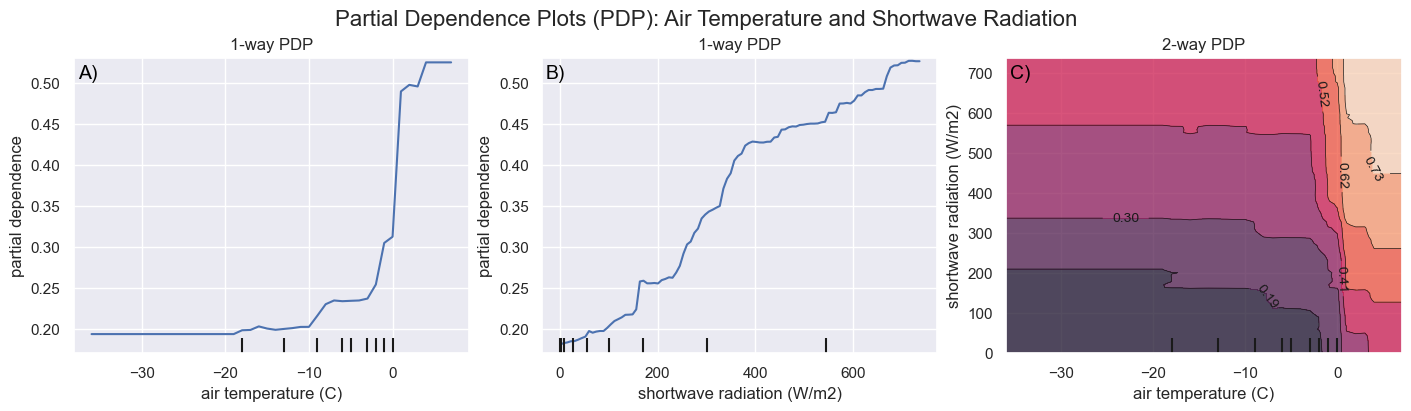

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # loaded model
    X=X_features,                # feature matrix used for training
    features=[nametemperature, nameshortwave, [nametemperature, nameshortwave]],
    kind=features_info["kind"],
    grid_resolution=10,   # reduce grid resolution for faster computation
    ax=ax
)

fig.suptitle("Partial Dependence Plots (PDP): Air Temperature and Shortwave Radiation", fontsize=16)
ax1, ax2, ax3 = ax
# ax1.set_title(f"1-way PDP: {nametemperature}")
# ax2.set_title(f"1-way PDP: {nameshortwave}")
# ax3.set_title(f"2-way PDP: {nametemperature} vs {nameshortwave}")

ax1.set_title("1-way PDP")
ax2.set_title("1-way PDP")
ax3.set_title("2-way PDP")

# set the ylimits for the 1-way PDPs to make them more comparable
ax1.set_ylim(0.17, 0.53)
ax2.set_ylim(0.17, 0.53)

# ax1.set_xlim(temperature_limits)
# ax2.set_xlim(shortwave_limits)

ax1.set_ylabel("partial dependence")
ax2.set_ylabel("partial dependence")

# add a A) B) C) label to the subplots
ax1.text(0.01, 0.93, 'A)', transform=ax1.transAxes, fontsize=14, color='black')
ax2.text(0.01, 0.93, 'B)', transform=ax2.transAxes, fontsize=14, color='black')
ax3.text(0.01, 0.93, 'C)', transform=ax3.transAxes, fontsize=14, color='black')

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_air_temperature_shortwave_radiation.png', dpi=500)

plt.show()

then temperature and wind speed

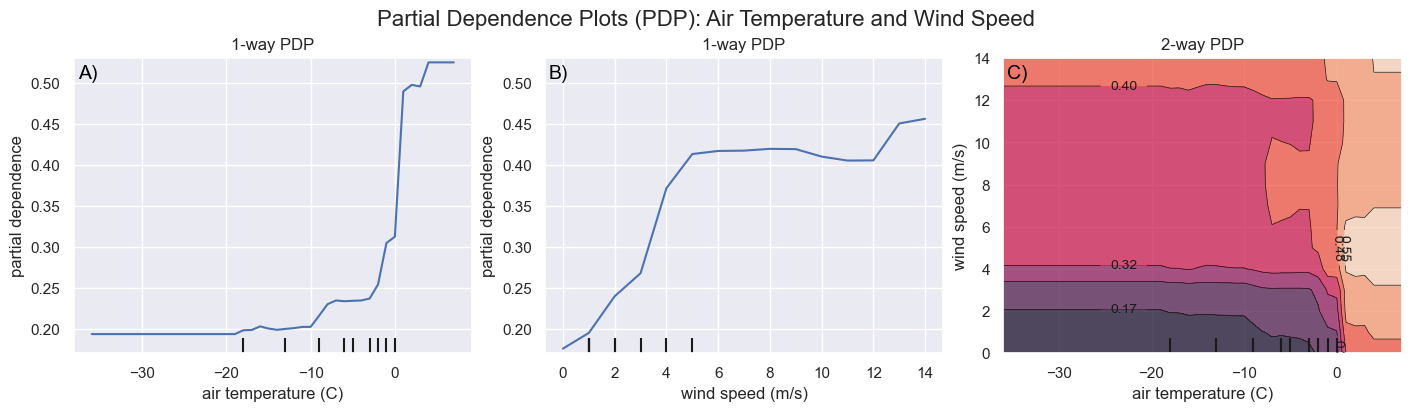

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # loaded model
    X=X_features,                # feature matrix used for training
    features=[nametemperature, namewindspeed, [nametemperature, namewindspeed]],
    kind=features_info["kind"],
    grid_resolution=10,   # reduce grid resolution for faster computation, make sure to turn this on when we are simply messing with the figure 
    ax=ax
)

fig.suptitle("Partial Dependence Plots (PDP): Air Temperature and Wind Speed", fontsize=16)
ax1, ax2, ax3 = ax

ax1.set_title("1-way PDP")
ax2.set_title("1-way PDP")
ax3.set_title("2-way PDP")

# set the ylimits for the 1-way PDPs to make them more comparable
ax1.set_ylim(0.17, 0.53)
ax2.set_ylim(0.17, 0.53)

ax1.set_ylabel("partial dependence")
ax2.set_ylabel("partial dependence")

# add a A) B) C) label to the subplots
ax1.text(0.01, 0.93, 'A)', transform=ax1.transAxes, fontsize=14, color='black')
ax2.text(0.01, 0.93, 'B)', transform=ax2.transAxes, fontsize=14, color='black')
ax3.text(0.01, 0.93, 'C)', transform=ax3.transAxes, fontsize=14, color='black')

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_air_temperature_wind_speed.png', dpi=500)

plt.show()

then shortwave and wind speed

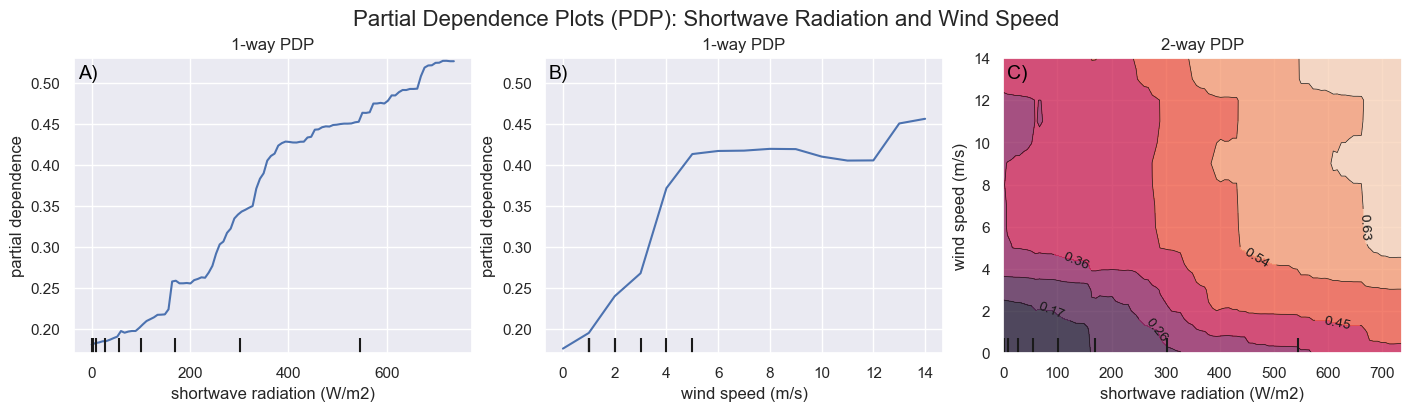

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # loaded model
    X=X_features,                # feature matrix used for training
    features=[nameshortwave, namewindspeed, [nameshortwave, namewindspeed]],
    kind=features_info["kind"],
    grid_resolution=10,   # reduce grid resolution for faster computation
    ax=ax
)

fig.suptitle("Partial Dependence Plots (PDP): Shortwave Radiation and Wind Speed", fontsize=16)
ax1, ax2, ax3 = ax

ax1.set_title("1-way PDP")
ax2.set_title("1-way PDP")
ax3.set_title("2-way PDP")

# set the ylimits for the 1-way PDPs to make them more comparable
ax1.set_ylim(0.17, 0.53)
ax2.set_ylim(0.17, 0.53)

ax1.set_ylabel("partial dependence")
ax2.set_ylabel("partial dependence")

# add a A) B) C) label to the subplots
ax1.text(0.01, 0.93, 'A)', transform=ax1.transAxes, fontsize=14, color='black')
ax2.text(0.01, 0.93, 'B)', transform=ax2.transAxes, fontsize=14, color='black')
ax3.text(0.01, 0.93, 'C)', transform=ax3.transAxes, fontsize=14, color='black')

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_shortwave_radiation_wind_speed.png', dpi=500)

plt.show()

### Subplots Together

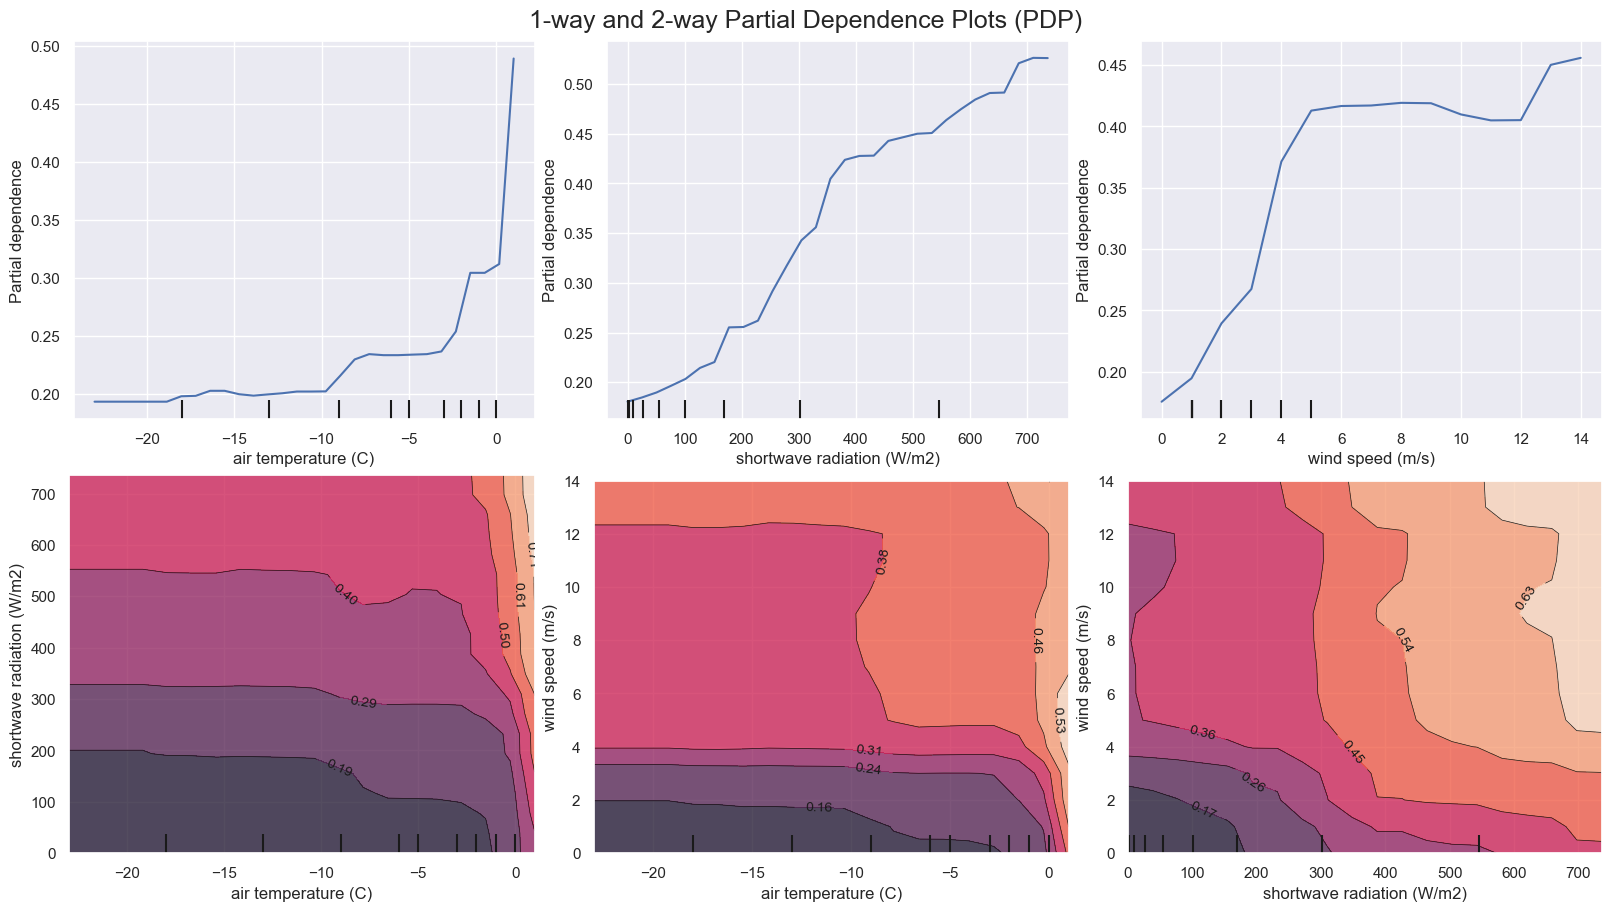

In [71]:
features_1way = [
    nametemperature,
    nameshortwave,
    namewindspeed,
]

features_2way = [
    [nametemperature, nameshortwave],
    [nametemperature, namewindspeed],
    [nameshortwave, namewindspeed],
]

# --- Create figure ----
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    constrained_layout=True
)

# -----------------------------------
# Row 1: 1-way PDPs
# -----------------------------------
for i, feat in enumerate(features_1way):
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,         
        features=[feat],
        kind="average",
        grid_resolution=30,
        ax=axes[0, i]
    )
    # axes[0, i].set_title(f"1-way PDP: {feat}")

# -----------------------------------
# Row 2: 2-way PDPs
# -----------------------------------
for i, feat_pair in enumerate(features_2way):
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,         
        features=[feat_pair],
        kind="average",
        grid_resolution=20,    # lower for speed
        ax=axes[1, i]
    )
    # axes[1, i].set_title(f"2-way PDP: {feat_pair[0]} × {feat_pair[1]}")

# Overall figure title
fig.suptitle("1-way and 2-way Partial Dependence Plots (PDP)", fontsize=18)

# set the limits for the 1-way PDPs to make them more comparable
for ax in axes[0, :]:
    ax.set_ylim(0.1, 0.6)
    ax.set_ylabel("partial dependence")
    
    
# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_combined.png', dpi=500)

plt.show()

NEW CODE

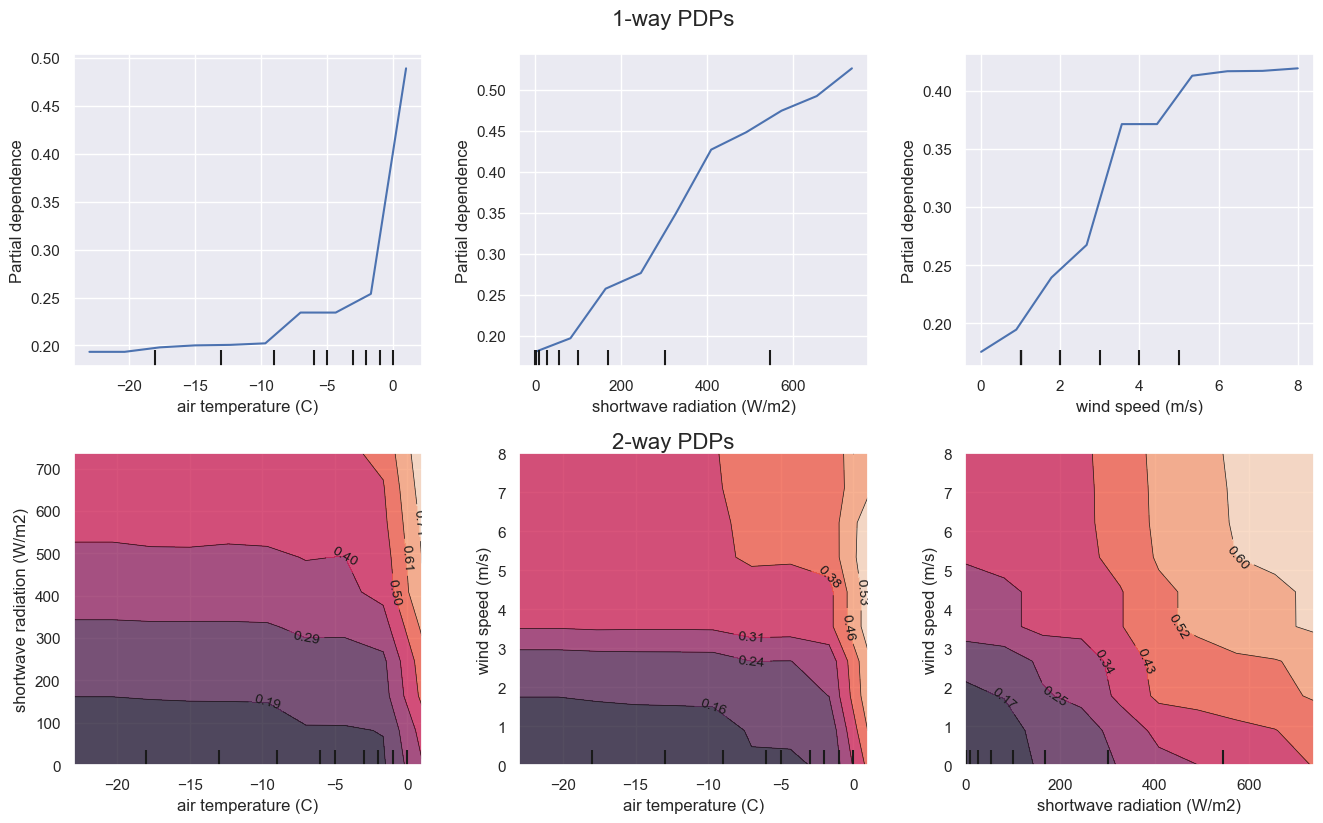

In [75]:
# ----------- User labels and feature names -----------
nametemperature_fig = "air temperature (℃)"
nameshortwave_fig   = "shortwave radiation (W m⁻²)"
namewindspeed_fig   = "wind speed (m s⁻¹)"

nametemperature = "air temperature (C)"
nameshortwave   = "shortwave radiation (W/m2)"
namewindspeed   = "wind speed (m/s)"

# Fixed axis limits for predictors
feature_limits = {
    nametemperature: (-25, 3),
    nameshortwave:   (0, 700),
    namewindspeed:   (0, 10),
}

# PDP limits
pdp_1d_ylim = (0.0, 0.5)
colorbar_limits = (0.0, 0.5)

# Grid resolution
grid_resolution_1d = 10
grid_resolution_2d = 10

# Features
features_1way = [
    (nametemperature, nametemperature_fig),
    (nameshortwave,   nameshortwave_fig),
    (namewindspeed,   namewindspeed_fig),
]

features_2way = [
    ([nametemperature, nameshortwave], (nametemperature_fig, nameshortwave_fig)),
    ([nametemperature, namewindspeed], (nametemperature_fig, namewindspeed_fig)),
    ([nameshortwave, namewindspeed],   (nameshortwave_fig, namewindspeed_fig)),
]

# ---------------- Create figure ----------------------
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    sharey='row',    # share y-axis for row 1
    constrained_layout=False
)
plt.subplots_adjust(hspace=0.28, wspace=0.28, top=0.90)

axes_flat = axes.ravel()  # flatten for easy indexing

# ---------------- Row 1: 1-way PDPs -------------------
for i, (feat_raw, feat_label) in enumerate(features_1way):
    ax = axes_flat[i]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution_1d,
        ax=ax
    )
    ax.set_xlabel(feat_label, fontsize=11)
    ax.set_ylabel("Partial dependence", fontsize=10)
    ax.set_ylim(*pdp_1d_ylim)
    if feat_raw in feature_limits:
        ax.set_xlim(*feature_limits[feat_raw])

# ---------------- Row 2: 2-way PDPs -------------------
mappables = []
for i, (feat_pair, feat_labels) in enumerate(features_2way):
    ax = axes_flat[3 + i]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_pair],
        kind="average",
        grid_resolution=grid_resolution_2d,
        ax=ax
    )
    ax.set_xlabel(feat_labels[0], fontsize=11)
    ax.set_ylabel(feat_labels[1], fontsize=11)

    # set axis limits for predictors
    x_raw, y_raw = feat_pair
    if x_raw in feature_limits:
        ax.set_xlim(*feature_limits[x_raw])
    if y_raw in feature_limits:
        ax.set_ylim(*feature_limits[y_raw])

    # --------- Detect 2D mappable for colorbar -----------
    for artist in ax.get_children():
        if isinstance(artist, matplotlib.collections.QuadMesh):
            mappables.append(artist)
            break
        if isinstance(artist, matplotlib.image.AxesImage):
            mappables.append(artist)
            break
        if isinstance(artist, matplotlib.contour.QuadContourSet):
            if artist.collections:
                mappables.append(artist.collections[0])
                break
        if isinstance(artist, matplotlib.collections.PolyCollection):
            try:
                _ = artist.get_array()
                mappables.append(artist)
                break
            except Exception:
                continue

# ---------------- Shared colorbar ----------------------
if mappables:
    vmin, vmax = colorbar_limits
    for mp in mappables:
        try:
            if hasattr(mp, "set_clim"):
                mp.set_clim(vmin, vmax)
        except Exception:
            continue
    cbar = fig.colorbar(mappables[0], ax=axes[1, :], orientation="vertical",
                        fraction=0.05, pad=0.03)
    cbar.set_label("Partial dependence (class=1 probability)", fontsize=11)
    cbar.set_ticks(np.linspace(vmin, vmax, 6))
else:
    print("Warning: no 2-D PDP detected. Colorbar not added.")

# ---------------- Row titles --------------------------
fig.text(0.5, 0.95, "1-way PDPs", ha='center', va='top', fontsize=16)
fig.text(0.5, 0.48, "2-way PDPs", ha='center', va='top', fontsize=16)

# ---------------- Panel labels A)-F) -------------------
panel_labels = ["A", "B", "C", "D", "E", "F"]
for ax, lab in zip(axes_flat, panel_labels):
    ax.text(0.02, 0.98, f"{lab})",
            transform=ax.transAxes,
            fontsize=13,
            fontweight='bold',
            color='gray',
            ha='left', va='top',
            zorder=1000,
            clip_on=False)

plt.show()

Clean up the formatting a bit....

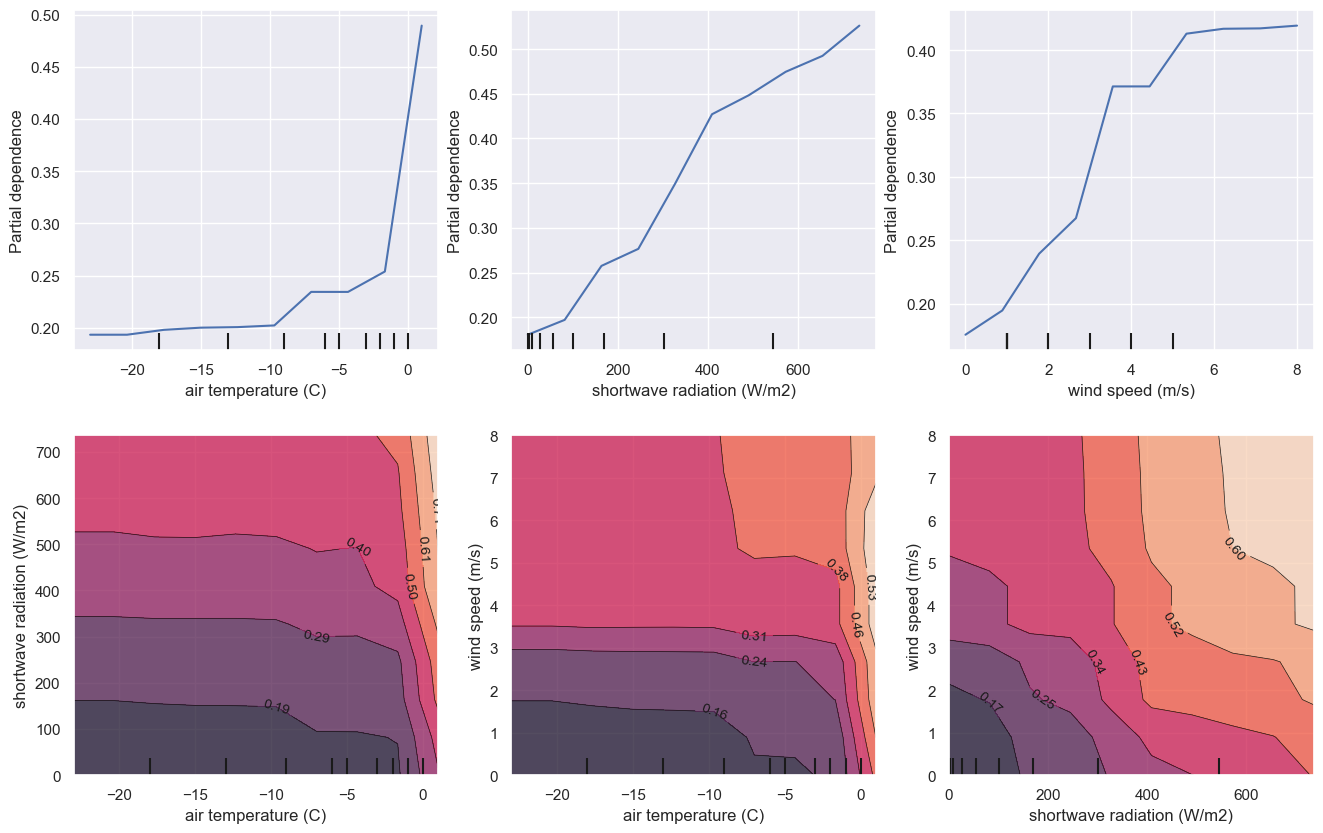

In [73]:
# Manuscript-ready axis labels
nametemperature_fig = "air temperature (℃)"
nameshortwave_fig = "shortwave radiation (W m⁻²)"
namewindspeed_fig = "wind speed (m s⁻¹)"

# Names as they appear in X_features:
nametemperature = "air temperature (C)"
nameshortwave = "shortwave radiation (W/m2)"
namewindspeed = "wind speed (m/s)"

# 1-way and 2-way feature sets
features_1way = [
    (nametemperature, nametemperature_fig),
    (nameshortwave, nameshortwave_fig),
    (namewindspeed, namewindspeed_fig),
]

features_2way = [
    ([nametemperature, nameshortwave],  (nametemperature_fig, nameshortwave_fig)),
    ([nametemperature, namewindspeed],  (nametemperature_fig, namewindspeed_fig)),
    ([nameshortwave, namewindspeed],    (nameshortwave_fig, namewindspeed_fig)),
]

# ---- Create figure ----
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    constrained_layout=False
)

# Share only the first row's y-axis
for j in range(1, 3):
    axes[0, j].sharey(axes[0, 0])

# Adjust spacing manually for row titles
plt.subplots_adjust(hspace=0.25, top=0.92, bottom=0.07)

grid_resolution = 10 # want to remove this, or increase to 50 or 100 for the final figure 

# ---------------------------------------------------
# Row 1 — 1-way PDPs
# ---------------------------------------------------
for i, (feat_raw, feat_label) in enumerate(features_1way):
    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution,
        ax=axes[0, i]
    )
    axes[0, i].set_xlabel(feat_label)
    axes[0, i].set_title("")  # remove per-panel titles

# ---------------------------------------------------
# Row 2 — 2-way PDPs
# ---------------------------------------------------
for i, (feat_raw, feat_labels) in enumerate(features_2way):
    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution,
        ax=axes[1, i]
    )
    # Set axis labels for 2-way PDP
    axes[1, i].set_xlabel(feat_labels[0])
    axes[1, i].set_ylabel(feat_labels[1])
    axes[1, i].set_title("")

# ---------------------------------------------------
# Row titles
# ---------------------------------------------------
# axes[0, 0].set_title("1-way PDPs", fontsize=16, pad=15, loc='left')
# axes[1, 0].set_title("2-way PDPs", fontsize=16, pad=15, loc='left')

# ---------------------------------------------------
# Panel Labels (A, B, C, D, E, F)
# ---------------------------------------------------
panel_labels = ["A", "B", "C", "D", "E", "F"]

for ax, label in zip(axes.ravel(), panel_labels):
    ax.text(
        0.02, 0.95, f"{label})",
        transform=ax.transAxes,
        fontsize=13,
        fontweight='bold',
        color='gray',
        ha='left', va='top'
    )
    

# set limits on the y-axis for the 1-way PDPs to make them more comparable
axes[0, 0].set_ylim(0.1, 0.6)
axes[0, 1].set_ylim(0.1, 0.6)
axes[0, 2].set_ylim(0.1, 0.6)

# label on the y-axis 
axes[0, 0].set_ylabel("partial dependence")
axes[0, 1].set_ylabel("partial dependence")
axes[0, 2].set_ylabel("partial dependence")

plt.show()

This needs the y-axis matching on the top row.\
also all the other limits matching for all the variables... 

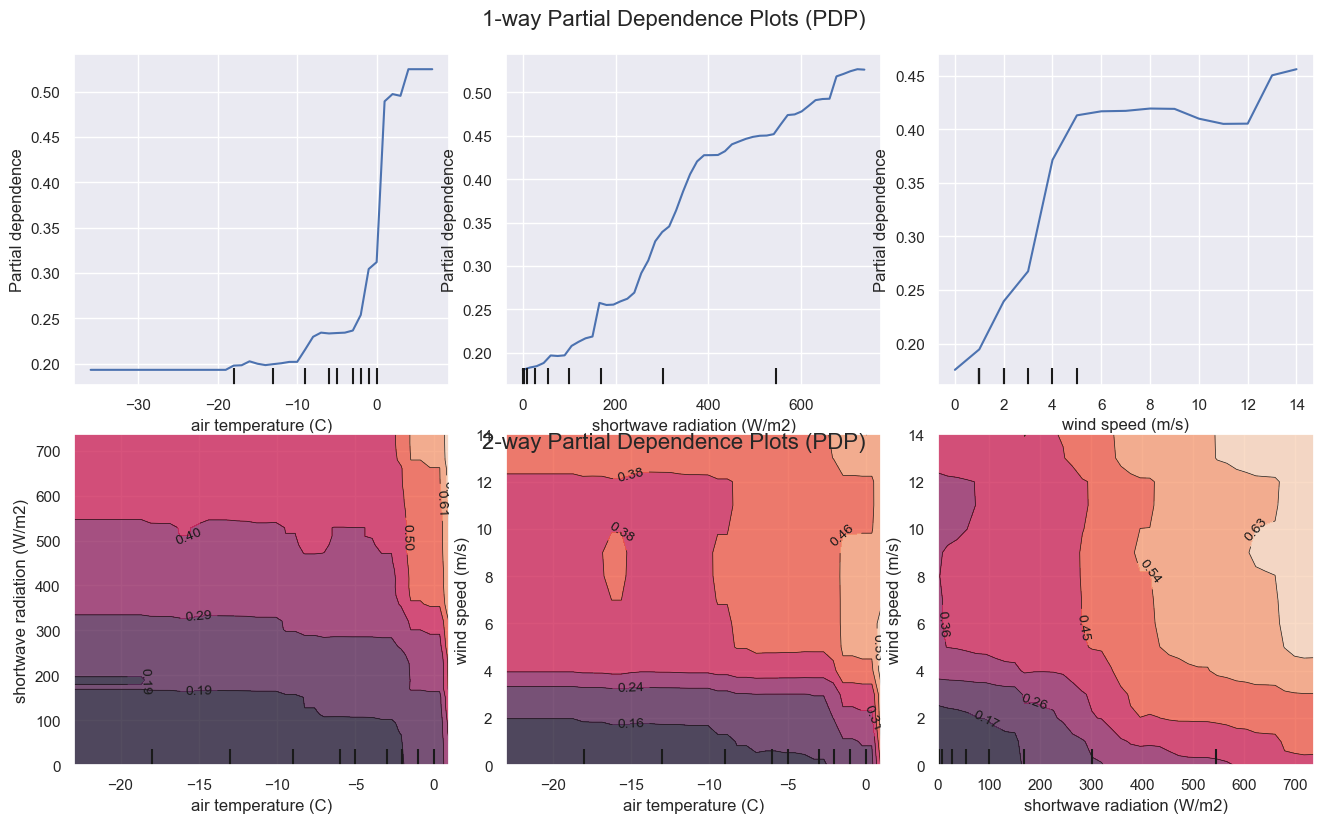

In [72]:
import matplotlib

# Fixed predictor limits
feature_limits = {
    nametemperature: (-25, 3),
    nameshortwave:   (0, 700),
    namewindspeed:   (0, 10),
}

# PDP y-axis limits for 1-D plots and color limits for 2-D
pdp_1d_ylim = (0.0, 0.5)
colorbar_limits = (0.0, 0.5)  # desired final vmin/vmax for 2-D

# Grid resolution (reduce for speed; increase for final figure)
grid_resolution_1d = 50
grid_resolution_2d = 40

# Optional: downsample X_features if it's very large (uncomment to use)
# X_plot = X_features.sample(n=5000, random_state=42) if len(X_features) > 5000 else X_features
X_plot = X_features  # using full X by default; change to downsampled version if needed

# Feature lists
features_1way = [
    (nametemperature, nametemperature_fig),
    (nameshortwave,   nameshortwave_fig),
    (namewindspeed,   namewindspeed_fig),
]

features_2way = [
    ([nametemperature, nameshortwave], (nametemperature_fig, nameshortwave_fig)),
    ([nametemperature, namewindspeed], (nametemperature_fig, namewindspeed_fig)),
    ([nameshortwave, namewindspeed],   (nameshortwave_fig, namewindspeed_fig)),
]

# ---------------- Create figure with y shared across each ROW ---------------
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    sharey='row'        # <-- this shares y-axis across columns for each row
)

plt.subplots_adjust(hspace=0.15, wspace=0.15, top=0.90) # was 0.28, 0.28, 0.90

# collect mappables for 2-D panels
mappables = []

# ---------------- Row 1: 1-way PDPs -------------------------------------
for col, (feat_raw, feat_label) in enumerate(features_1way):
    ax = axes[0, col]
    # create 1D PDP
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_plot,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution_1d,
        ax=ax
    )
    # axis labels and limits
    ax.set_xlabel(feat_label, fontsize=11)
    ax.set_ylabel("Partial dependence", fontsize=10)
    ax.set_ylim(*pdp_1d_ylim)
    if feat_raw in feature_limits:
        ax.set_xlim(*feature_limits[feat_raw])

# ---------------- Row 2: 2-way PDPs -------------------------------------
for col, (feat_pair, feat_labels) in enumerate(features_2way):
    ax = axes[1, col]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_plot,
        features=[feat_pair],
        kind="average",
        grid_resolution=grid_resolution_2d,
        ax=ax
    )

    # nicer axis labels (x=first, y=second)
    ax.set_xlabel(feat_labels[0], fontsize=11)
    ax.set_ylabel(feat_labels[1], fontsize=11)

    # enforce predictor limits if known
    x_raw, y_raw = feat_pair[0], feat_pair[1]
    if x_raw in feature_limits:
        ax.set_xlim(*feature_limits[x_raw])
    if y_raw in feature_limits:
        ax.set_ylim(*feature_limits[y_raw])

    # --- robust mappable detection (works for QuadMesh, ContourSet, AxesImage) ---
    # Check ax.images (AxesImage, pcolormesh sometimes appears here) and ax.collections
    for artist in ax.get_children():
        # QuadMesh (pcolormesh) in Matplotlib is matplotlib.collections.QuadMesh
        if isinstance(artist, matplotlib.collections.QuadMesh):
            mappables.append(artist)
            break
        # AxesImage (imshow-like)
        if isinstance(artist, matplotlib.image.AxesImage):
            mappables.append(artist)
            break
        # Contour: contourf creates a QuadContourSet, whose .collections are PolyCollections
        if isinstance(artist, matplotlib.contour.QuadContourSet):
            # grab the first PolyCollection from contourset.collections
            if artist.collections:
                mappables.append(artist.collections[0])
                break
        # PolyCollection from contourf may also appear directly in collections
        if isinstance(artist, matplotlib.collections.PolyCollection):
            # these often hold arrays accessible via get_array()
            try:
                _ = artist.get_array()
                mappables.append(artist)
                break
            except Exception:
                pass
    # if nothing found yet, try ax.collections and ax.images as fallback
    if len(mappables) == 0 or (len(mappables) > 0 and mappables[-1].axes is not ax):
        # look in images
        if getattr(ax, "images", None):
            for img in ax.images:
                if hasattr(img, "get_array"):
                    mappables.append(img)
                    break
        # look in collections
        if getattr(ax, "collections", None) and (len(mappables) == 0 or mappables[-1].axes is not ax):
            for coll in ax.collections:
                if hasattr(coll, "get_array"):
                    mappables.append(coll)
                    break

# ---------------- Determine global vmin/vmax and apply ------------------
# Extract numeric arrays from all detected mappables
arrays = []
for mp in mappables:
    try:
        arr = mp.get_array()
        if arr is None:
            continue
        # flatten masked arrays / convert to numpy
        arr = np.asarray(arr).ravel()
        if arr.size > 0:
            arrays.append(arr)
    except Exception:
        # skip any artist that doesn't provide get_array
        pass

if len(arrays) > 0:
    allvals = np.concatenate(arrays)
    # Apply the user desired fixed colorbar limits if you want consistent 0..0.5:
    vmin, vmax = colorbar_limits  # use the fixed limits you requested
    # If you prefer automatic, uncomment these lines instead:
    # vmin, vmax = float(np.nanmin(allvals)), float(np.nanmax(allvals))
    # Apply limits to each mappable
    for mp in mappables:
        try:
            # different artists support different methods:
            if hasattr(mp, "set_clim"):
                mp.set_clim(vmin, vmax)
            elif hasattr(mp, "set_norm"):
                mp.set_norm(matplotlib.colors.Normalize(vmin=vmin, vmax=vmax))
        except Exception:
            pass

    # Add a single shared colorbar for the 2-D axes
    # use the first mappable as reference and attach to second-row axes
    cb = fig.colorbar(mappables[0], ax=axes[1, :], orientation="vertical", fraction=0.05, pad=0.03)
    cb.set_label("partial dependence (class=1 probability)", fontsize=11)
    cb.set_ticks(np.linspace(vmin, vmax, 6))
else:
    print("Warning: no 2-D mappables detected; shared colorbar not added. "
          "This can happen if PDP produced lines instead of 2-D surfaces for your sklearn version.")

# ---------------- Row titles centered -----------------------------------
fig.text(0.5, 0.95, "1-way Partial Dependence Plots (PDP)", ha='center', va='top', fontsize=16)
fig.text(0.5, 0.48, "2-way Partial Dependence Plots (PDP)", ha='center', va='top', fontsize=16)

# ---------------- Panel labels A)-F) ------------------------------------
panel_labels = ["A", "B", "C", "D", "E", "F"]
count = 0
for r in range(2):
    for c in range(3):
        ax = axes[r, c]
        # place label on top-left; ensure visible by turning clipping off and high zorder
        ax.text(0.02, 0.98, f"{panel_labels[count]})",
                transform=ax.transAxes,
                fontsize=13,
                fontweight='bold',
                color='gray',
                ha='left', va='top',
                zorder=1000,
                clip_on=False)
        count += 1
        

# set limits on the y-axis for the 1-way PDPs to make them more comparable
axes[0, 0].set_ylim(0.1, 0.6)
axes[0, 1].set_ylim(0.1, 0.6)
axes[0, 2].set_ylim(0.1, 0.6)

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_combined.png', dpi=500)

plt.show()

still many things not working with limits and labels and such

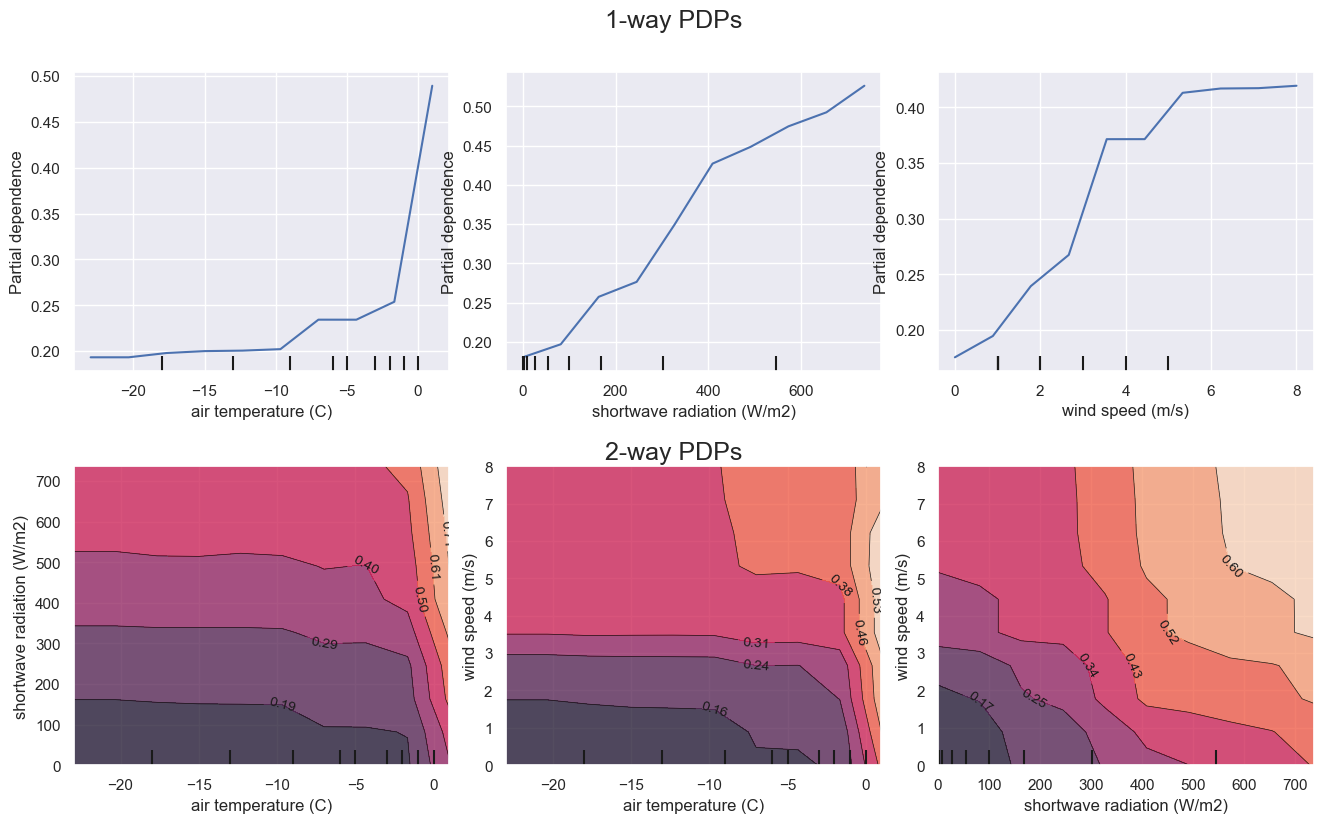

In [35]:
# ------------------------------------------------------------------
# Labels
# ------------------------------------------------------------------
nametemperature_fig = "air temperature (℃)"
nameshortwave_fig   = "shortwave radiation (W m⁻²)"
namewindspeed_fig   = "wind speed (m s⁻¹)"

nametemperature = "air temperature (C)"
nameshortwave   = "shortwave radiation (W/m2)"
namewindspeed   = "wind speed (m/s)"

# ------------------------------------------------------------------
# Feature lists
# ------------------------------------------------------------------
features_1way = [
    (nametemperature, nametemperature_fig),
    (nameshortwave, nameshortwave_fig),
    (namewindspeed,  namewindspeed_fig),
]

features_2way = [
    ([nametemperature, nameshortwave], (nametemperature_fig, nameshortwave_fig)),
    ([nametemperature, namewindspeed], (nametemperature_fig, namewindspeed_fig)),
    ([nameshortwave, namewindspeed],   (nameshortwave_fig, namewindspeed_fig)),
]

# ------------------------------------------------------------------
# Figure
# ------------------------------------------------------------------
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    constrained_layout=False
)

plt.subplots_adjust(hspace=0.32, wspace=0.15, top=0.88)

grid_resolution = 10

# ------------------------------------------------------------------
# 1-way PDPs (row 0)
# ------------------------------------------------------------------
for i, (feat_raw, feat_label) in enumerate(features_1way):

    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution,
        ax=axes[0, i]
    )

    axes[0, i].set_xlabel(feat_label)
    axes[0, i].set_ylabel("Partial Dependence")
    
    # Apply axis limits
    axes[0, i].set_ylim(0, 0.5)
    if feat_raw == nametemperature:
        axes[0, i].set_xlim(-25, 3)
    elif feat_raw == nameshortwave:
        axes[0, i].set_xlim(0, 700)
    elif feat_raw == namewindspeed:
        axes[0, i].set_xlim(0, 10)

# ------------------------------------------------------------------
# 2-way PDPs (row 1)
# ------------------------------------------------------------------
contours = []
for i, (feat_raw, feat_labels) in enumerate(features_2way):

    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution,
        ax=axes[1, i]
    )

    ax = axes[1, i]
    ax.set_xlabel(feat_labels[0])
    ax.set_ylabel(feat_labels[1])

    # Apply axis limits
    if feat_raw[0] == nametemperature:
        ax.set_xlim(-25, 3)
    elif feat_raw[0] == nameshortwave:
        ax.set_xlim(0, 700)
    elif feat_raw[0] == namewindspeed:
        ax.set_xlim(0, 10)

    if feat_raw[1] == nametemperature:
        ax.set_ylim(-25, 3)
    elif feat_raw[1] == nameshortwave:
        ax.set_ylim(0, 700)
    elif feat_raw[1] == namewindspeed:
        ax.set_ylim(0, 10)

    # ----- Catch both contourf and pcolormesh -----
    for artist in ax.collections + ax.images:
        if hasattr(artist, "get_array"):
            contours.append(artist)

# ------------------------------------------------------------------
# Shared vmin/vmax
# ------------------------------------------------------------------
# all_vals = np.concatenate([c.get_array() for c in contours])
# vmin, vmax = np.min(all_vals), np.max(all_vals)

# for c in contours:
#     c.set_clim(vmin, vmax)

# # Shared colorbar for 2-way PDPs
# cbar = fig.colorbar(contours[0], ax=axes[1, :], orientation="horizontal",
#                     fraction=0.08, pad=0.12)
# cbar.set_label("Partial Dependence")

# ------------------------------------------------------------------
# Row Titles
# ------------------------------------------------------------------
fig.text(0.5, 0.93, "1-way PDPs", fontsize=18, ha='center')
fig.text(0.5, 0.45, "2-way PDPs", fontsize=18, ha='center')

# ------------------------------------------------------------------
# Panel Labels A–F
# ------------------------------------------------------------------
panel_labels = ["A", "B", "C", "D", "E", "F"]
for ax, lab in zip(axes.ravel(), panel_labels):
    ax.text(0.02, 0.96, f"{lab})",
            transform=ax.transAxes,
            fontsize=14,
            color='gray',
            fontweight='bold',
            ha='left', va='top')

plt.show()